<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

**Grupo Nro.3:**
* Patricia Loto
* Gaspar García Bazán
* Ashley Quezada
* Tomás Colla
* Pablo Estrada 

<h1> Práctico  Análisis y Visualización de Datos - 2020</h1>


En este práctico vamos a trabajar con el dataset del [Indíce de Libertad Humana del 2018](https://www.cato.org/human-freedom-index-new) publicado por el Instituto Cato, el Instituto Fraser y el Instituto Liberales en la Fundación Friedrich Naumann para la libertad. Este índice mide en detalle lo que entendemos como libertad humana en el mundo, utilizando 76 indicadores de libertad personal y económica en distintos aspectos. Dicho índice puede tomar valores en una escala del 1 al 10, donde 10 representa mayor libertad y 1 menor libertad.  the average human freedom rating for 162 countries in 2016 was 6.89

Las variables más importantes sobre las que se mide el índice son:

* Estado de Derecho (Rule of Law)
* Protección y seguridad (Security and Safety)
* Movilidad Social (Movement)
* Religión(Religion)
* Asociación, Asamblea y Sociedad Civil (Association, Assembly, and Civil Society)
* Expresión e información (Expression and Information)
* Identidad y relaciones (Identity and Relationships)
* Tamaño del gobierno (Size of Government)
* Sistema legal y derechos de propiedad (Legal System and Property Rights)
* Acceso a dinero sólido (Access to Sound Money)
* Libertad para comerciar internacionalmente (Freedom to Trade Internationally)
* Regulación de crédito, trabajo y negocios (Regulation of Credit, Labor, and Business)


Nosotros centraremos nuestro análisis en variables relacionadas a *Identity and Relationships* en países de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto a libertades de identidad?**. Sin embargo, para responder este interrogante tenemos que plantear también estas subpreguntas:

1. ¿Qué significa tener un puntaje de 4.5? Para esto, es necesario comparar los puntajes de la región con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años en Latinoamérica? ¿Hemos mejorado o empeorado respecto a la media mundial?
3. En este estudio, la libertad se mide con un estimador principal: *hf_score* que hace referencia a la *Libertad Humana*, que a su vez está calculado en base a dos otros estimadores *ef_score* para *Libertad Económica* y *pf_score*, para *Libertad Personal*. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?


In [43]:
 # Importamos las librerías necesarias
import matplotlib.pyplot as plt
import numpy
import pandas 
import seaborn
import scipy
import pandas as pd

Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [44]:
dataset = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

(1620, 120)

El dataset cuenta con 1620 filas y 120 columnas.

Revisamos las columnas del dataset

In [45]:
dataset.columns 

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [46]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [47]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0,10,10,10,7.5,5.8,8.01,46,7.67,30,7.84,38
1,2017,DZA,Algeria,Middle East & North Africa,-,0,0,0,0,0,5.2,146,4.77,159,4.99,155
2,2017,AGO,Angola,Sub-Saharan Africa,10,0,0,0,5,5,5.98,121,4.83,158,5.4,151
3,2017,ARG,Argentina,Latin America & the Caribbean,10,10,10,10,10,10,8.04,41,5.67,147,6.86,77
4,2017,ARM,Armenia,Caucasus & Central Asia,7,10,10,10,7.5,8.2,7.15,72,7.7,27,7.42,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,-,10,10,10,10,10,9.29,7,8.18,6,8.73,4
1616,2008,DNK,Denmark,Western Europe,-,10,10,10,10,10,9.49,3,7.98,9,8.73,4
1617,2008,CHE,Switzerland,Western Europe,-,10,10,10,10,10,9.31,6,8.35,4,8.83,3
1618,2008,NZL,New Zealand,Oceania,-,10,10,10,10,10,9.42,4,8.46,3,8.94,2


Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [48]:
dataset.dtypes

year                                  int64
ISO_code                             object
countries                            object
region                               object
hf_score                             object
                                      ...  
ef_regulation_business_compliance    object
ef_regulation_business               object
ef_regulation                        object
ef_score                             object
ef_rank                              object
Length: 120, dtype: object

In [49]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
  dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


# Parte 1



## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  3. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.
  3. ¿Tiene sentido calcular la moda?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

## Descripción de las variables:
El índice de libertad se compone de dos brazos principales: el índice de libertad económica y el índice de libertad personal.
A su vez, el índice de libertad personal incluye Protección Legal y Seguridad y Libertades personales Específicas.

Las libertades personales específicas incluyen libertad de movilidad (doméstica y entre fronteras), de religion, de asociación civil, de expresion e información, y por último libertad de identidad personal y relaciones. Esta última se compone de:
    
  * Libertad para escoger género legalmente: _pf_identity_legal_. En general asume los valores 0 o 10, dependiendo de si es o no es posible
cambiarse legalmente el género, respectivamente.
  * Libertad de tener pareja de mismo género (para ambos sexos): _pf_identity_sex_male_ y _pf_identity_sex_female_
  * Libertad de divorciarse: _pf_identity_divorce_. 

-_pf_identity_ representa el promedio de la subcategoría anterior (libertad de identidad)

-_pf_score_ representa el promedio todas las subcategorías de libertad personal
     
-_ef_score_ representa el promedio  todas las subcategorias de libertad económica

-_pf_score_ y _ef_score_ son rankings que permiten la comparación entre países. 

-_hf_score_ es el promedio de _pf_score_ y _ef_score_


     
    

In [50]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

## Resolución Ejercicio 1.1:
    

In [51]:
#Ejercício 1: List Comprehension

df1 = dataset.iloc[:,[4, 5, 6, 7, 8, 9, 10, 12, 14]]
df1gen= df1.items()

def range(serie):
    rango = serie.max() - serie.min()
    return rango

idx = ["rango"]

rangos = [range(col) for label, col in df1gen]
rangos = numpy.array(rangos).reshape(-1,len(rangos))
rangos = pandas.DataFrame(rangos, index=idx, columns=df1.columns, dtype=None, copy=False)


#rangos
df_rangos= pandas.DataFrame(rangos).transpose()
df_rangos



,rango
pf_identity_legal,10.00
pf_identity_sex_male,10.00
pf_identity_sex_female,10.00
pf_identity_sex,10.00
pf_identity_divorce,10.00
pf_identity,10.00
pf_score,7.34
ef_score,6.53
hf_score,5.43


## Resolución Ejercicio 1.2

Si se quisiera comparar la variable pf_identity y hf_score de cada país, lo más apropiado no sería hacerlo con un valor en particular sino observar la evolución de dichas variables a lo largo de los años para cada país. Es decir, siempre y cuando no estemos interesados en saber cuál era la situación en un año particular (en este caso si habría que quedarse con el valor correspondiente sólo a ese año), es conveniente a fines comparativos medir qué tanto mejoró o empeoró cada índice en cada país y sacar conclusiones en base a eso. 

## Resolución Ejercicio 1.3

In [52]:
# Ejercicio 3

# Calculamos y mostramos la media mundial y de latinoamerica por año
media_mundial_anio = dataset.groupby(['year'])[['pf_identity', 'hf_score']].mean()
media_latino_anio = dataset[dataset.region == 'Latin America & the Caribbean'].groupby(['year'])[['pf_identity', 'hf_score']].mean()
print("         ", "Media Mundial","            ", "Media de Latinoamérica")
# concateno los resultados de la media
dataframe_media = pd.concat([media_mundial_anio, media_latino_anio], axis=1)
display(dataframe_media)

# Calculamos y mostramos la mediana mundial y de latinoamerica por año
mediana_mundial_anio = dataset.groupby(['year'])[['pf_identity', 'hf_score']].median()
mediana_latino_anio = dataset[dataset.region == 'Latin America & the Caribbean'].groupby(['year'])[['pf_identity', 'hf_score']].median()
print("\n          ", "Mediana Mundial", "      ", "Mediana de Latinoamérica")
# concateno los resultados de la mediana
dataframe_mediana = pd.concat([mediana_mundial_anio, mediana_latino_anio], axis=1)
display(dataframe_mediana)


# Calculamos y mostramos la desviación estándar
sd_mundial_anio = dataset.groupby(['year'])[['pf_identity', 'hf_score']].std(ddof=0)
sd_latino_anio = dataset[dataset.region == 'Latin America & the Caribbean'].groupby(['year'])[['pf_identity', 'hf_score']].std(ddof=0)
print("\n          ", "SD Mundial", "      ", "SD de Latinoamérica")
dataframe_sd = pd.concat([sd_mundial_anio, sd_latino_anio], axis=1)
display(dataframe_sd)

# conclusiones
print("La media de la variable pf_identity para el año 2017 a nivel mundial es:", round(dataframe_media.iloc[9,0], 3), "la cual es menor que en Latinoamérica" 
      " donde la media es de:",round(dataframe_media.iloc[9,2], 3),"\n Por otra parte la media de la variable hf_score a nivel mundial es de:",
      round(dataframe_media.iloc[9,1],3), "y es menor que la media para Latinoamérica, que es:",round(dataframe_media.iloc[9,3], 3))




          Media Mundial              Media de Latinoamérica


,pf_identity,hf_score,pf_identity,hf_score
year,,,,
2008,7.721986,7.078014,8.904000,7.130000
2009,7.721986,7.083050,8.904000,7.112000
2010,7.485621,7.035294,8.946154,7.087692
2011,7.452941,7.014575,9.138462,7.090000
2012,7.452941,6.978039,9.138462,7.049615
2013,7.367516,6.970191,9.138462,7.027308
2014,7.416352,6.949937,9.042308,7.005769
2015,6.964151,6.922264,7.569231,6.960000
2016,6.870370,6.892716,7.665385,6.962308



           Mediana Mundial        Mediana de Latinoamérica


,pf_identity,hf_score,pf_identity,hf_score
year,,,,
2008,10.0,7.040,10.0,7.130
2009,10.0,7.020,10.0,7.060
2010,8.8,6.960,10.0,7.085
2011,8.8,6.960,10.0,7.030
2012,8.8,6.880,10.0,7.055
2013,8.8,6.870,10.0,7.045
2014,8.8,6.830,10.0,6.965
2015,8.2,6.780,6.7,6.925
2016,8.2,6.820,6.7,6.985



           SD Mundial        SD de Latinoamérica


,pf_identity,hf_score,pf_identity,hf_score
year,,,,
2008,3.072691,1.025467,1.775946,0.556791
2009,3.072691,0.987082,1.775946,0.549130
2010,3.247531,0.993985,1.754167,0.571343
2011,3.253255,1.027654,1.501045,0.551076
2012,3.253255,1.044145,1.501045,0.572783
2013,3.267973,1.038418,1.501045,0.595176
2014,3.243375,1.081756,1.673130,0.674196
2015,2.944994,1.106719,1.910652,0.728228
2016,3.059773,1.107213,1.966829,0.698109


La media de la variable pf_identity para el año 2017 a nivel mundial es: 6.497 la cual es menor que en Latinoamérica donde la media es de: 7.4 
 Por otra parte la media de la variable hf_score a nivel mundial es de: 6.888 y es menor que la media para Latinoamérica, que es: 6.952


In [53]:
# conclusiones
print("La media de la variable pf_identity para el año 2017 a nivel mundial es:", round(dataframe_media.iloc[9,0], 3), "la cual es menor que en Latinoamérica" 
      " donde la media es de:",round(dataframe_media.iloc[9,2], 3),"\n Por otra parte la media de la variable hf_score a nivel mundial es de:",
      round(dataframe_media.iloc[9,1],3), "y es menor que la media para Latinoamérica, que es:",round(dataframe_media.iloc[9,3], 3))
#p= media_mundial_anio[-1:] #funciona muestra la última fila con -1

print("La mediana de la variable pf_identity a nivel mundial es:", round(dataframe_mediana.iloc[9,0], 3), "la cual también es menor que en Latinoamérica \n" 
      " donde la mediana es de:",round(dataframe_mediana.iloc[9,2], 3)," \n Por otra parte, la mediana de la variable hf_score a nivel global es de:",
     round(dataframe_mediana.iloc[9,1], 3), "y es menor que la media para Latinoamérica, que es:",round(dataframe_mediana.iloc[9,3], 3))

print("La desviación estándar de la variable pf_identity a nivel mundial es:", round(dataframe_sd.iloc[9,0], 3), "la cual es más del doble que en Latinoamérica," 
      " donde la desviación estándar es de:", round(dataframe_sd.iloc[9,2], 3)," \n Por otra parte la std(σ) de la variable hf_score a nivel mundial es de:",
      round(dataframe_sd.iloc[9,3], 3), "y es mayor que la std(σ) para Latinoamérica, que es:", round(dataframe_sd.iloc[9,1], 3), "esto indica que hay mucha mayor dispersion de los datos en"
      " en a nivel global en comparación a  Latinoamérica")

La media de la variable pf_identity para el año 2017 a nivel mundial es: 6.497 la cual es menor que en Latinoamérica donde la media es de: 7.4 
 Por otra parte la media de la variable hf_score a nivel mundial es de: 6.888 y es menor que la media para Latinoamérica, que es: 6.952
La mediana de la variable pf_identity a nivel mundial es: 7.5 la cual también es menor que en Latinoamérica 
 donde la mediana es de: 6.7  
 Por otra parte, la mediana de la variable hf_score a nivel global es de: 6.825 y es menor que la media para Latinoamérica, que es: 6.915
La desviación estándar de la variable pf_identity a nivel mundial es: 3.144 la cual es más del doble que en Latinoamérica, donde la desviación estándar es de: 1.956  
 Por otra parte la std(σ) de la variable hf_score a nivel mundial es de: 0.757 y es mayor que la std(σ) para Latinoamérica, que es: 1.101 esto indica que hay mucha mayor dispersion de los datos en en a nivel global en comparación a  Latinoamérica


## Resolución Ejercicio 1.4

Dada la naturaleza de los datos, no tiene mucho sentido calcular la moda, ya que la misma estaría indicando el valor de la variable que más se repite, y sin contextualizar, ese es un dato que no aporta mucho conocimiento. Es decir, de nada sirve calcular la moda de una variable a nivel mundial, pero si sería útil calcularla por región para saber, por ejemplo, cual es la situacion de la mayoría de los países en cada región. Sin embargo, puede que tal vez los mismos datos atenten contra esta intención, ya que por ejemplo si tenemos un país en Europa con un pf_identity de 7.4 y otro en la misma región de 7.6, a fines teóricos y empíricos se podría decir que ambos países se encuentran en la misma situación, sin embargo, el calcular la moda directamente no nos "agrupará" estos dos países en la misma situación ya que el valor específico de cada uno distinto. Por eso sería más útil en vez de calcular la moda es aplicar otro enfoque, como por ejemplo dividir los valores en intervalos y contar, para cada región, cuántos países se encuentran dentro de cada intervalo.

#  Resolución Ejercicio 1.5

## Valores faltantes

Una alternativa para sanear los valores faltantes (NaN's) es aproximar dichos valores por las medias o medianas regionales de cada variable.

Otra alternativa es aplicar alguna metodología de interpolación como _scipy.interpolate.CubicSpline_


#  Resolución Ejercicio 1.6 
## Outliers
Para visualizar los outliers se utilizarán boxplot o gráficos de caja para cada una de las variables: *pf_identity* y *hf_score*.


**BoxPlot para la variable pf_identity**

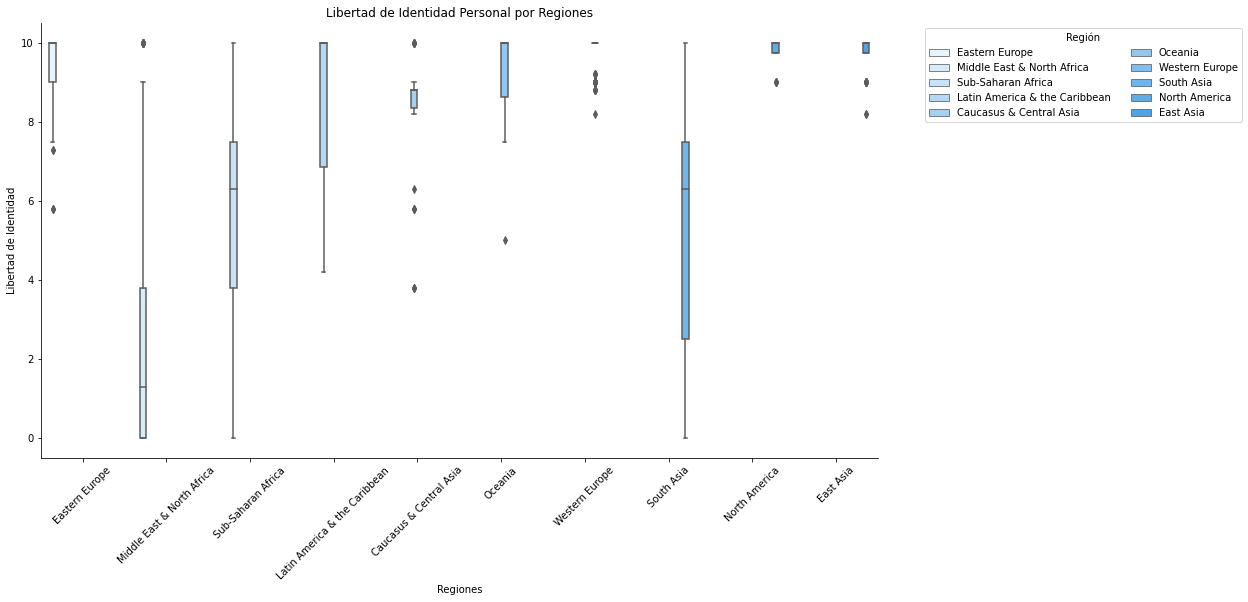

In [54]:
plt.figure(figsize=(15,8))
seaborn.boxplot(data= dataset, x="region", y='pf_identity', color=BLUE, hue= "region")
plt.ylabel('Libertad de Identidad')
plt.xlabel('Regiones')
plt.title('Libertad de Identidad Personal por Regiones')
plt.xticks(rotation=45)
plt.legend(ncol = 2, title= "Región", bbox_to_anchor=(1.05, 1))
seaborn.despine()
plt.show()

Como puede observarse, a excepción de las regiones ""Middle East and North Africa", Sub-Saharan Africa y South Asia" y , la mayoría de las observaciones están concentradas en rangos cortos, es decir, están moderadamente agrupadas. Esto último es particularmente notable para las regiones de "Eastern Europe", "Western Europe", "North America" y "East Asia". 



**BoxPlot para la variable hf_score**

A continuación se puede ver el BoxPlot para la variable _hf_score_. Al igual que para la variable _pf_identity_, los datos se muestran concentrados en intervalos pequeños. En este caso, la mayor dispersión la exhiben las regiones "Middle East & North Africa" y "Oceanía".





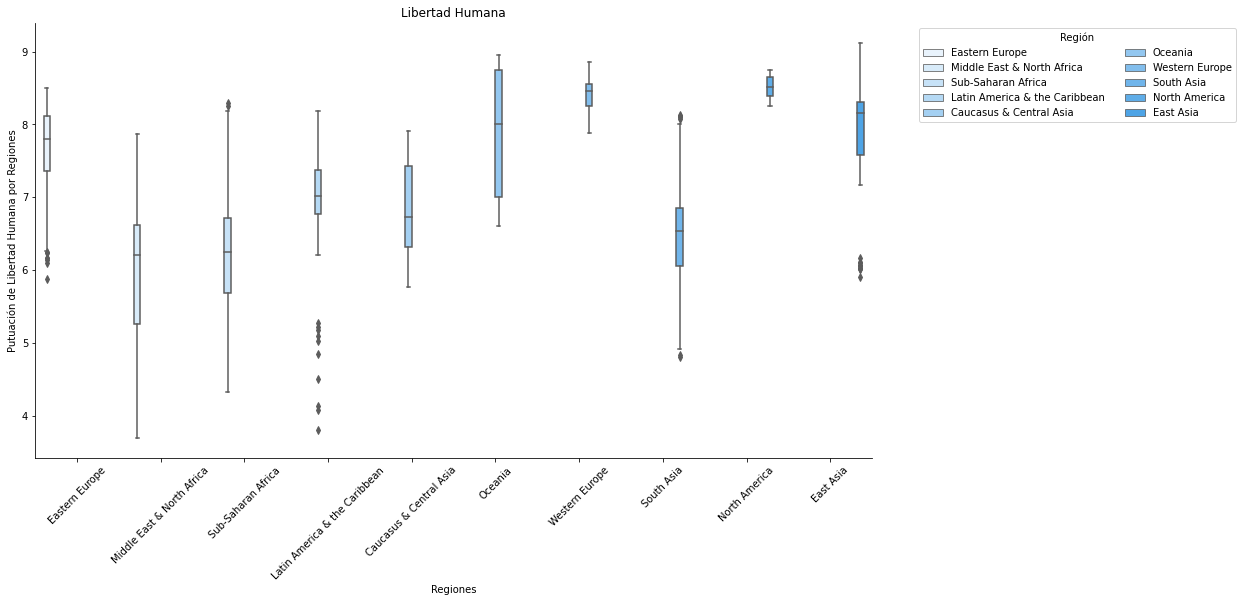

In [55]:
#BoxPlot para la variable hf_score:
plt.figure(figsize=(15,8))
seaborn.boxplot(data= dataset, x="region", y='hf_score', color=BLUE, hue= "region")
plt.ylabel('Putuación de Libertad Humana por Regiones')
plt.xlabel('Regiones')
plt.title('Libertad Humana')
plt.xticks(rotation=45)
plt.legend(ncol = 2, title= "Región", bbox_to_anchor=(1.05, 1))
seaborn.despine()


### ¿Cómo limpiamos los Outliers?

Observando los gráficos de caja del ejercicio anterior, para la variable _pf_identity_ puede verse que cada región muestra sus propios outliers. En términos globales de la variable, los outliers de una región son valores típicos de otras (e.g, los outliers de Eastern Europe nos son valores atípicos para LATAM). Por otro lado, los valores más alejados (o inusuales) los presenta la región "Middle East & North Africa" y algunos valores extremos de South Asia y SS-Africa. 

Se pueden limpiar los outliers a partir de la función __clean_outliers__

In [56]:
#Primero estimo la media y desviación estándar_

std_pf_id = dataset.pf_identity.std()
mean_pf_id = dataset.pf_identity.mean()
print("la desviación estandar de pf_identity es:", round(std_pf_id, 2))
print("la media de pf_identity es:", round(mean_pf_id, 2))
print("1,5 veces la desviacion estandar es:", round(1.5*std_pf_id, 2))

# clean outliers
def clean_outliers(dataset, column_name, a):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <= (a* interesting_col.std()))
    #print("Se remueven", a, "veces la desviación estándar")
    return dataset[mask_outlier]

#limpio de outliers a df_gb_CountryMean
df_cleaned = clean_outliers(dataset, "pf_identity", a = 2)

print("Fijando el parametro a en 1.5 se remuven", len(dataset) - len(df_cleaned), "filas")
print("El valor mínimo de pf_identiry considerado es:", df_cleaned.pf_identity.min())


la desviación estandar de pf_identity es: 3.18
la media de pf_identity es: 7.28
1,5 veces la desviacion estandar es: 4.77
Fijando el parametro a en 1.5 se remuven 182 filas
El valor mínimo de pf_identiry considerado es: 1.3


Aplicando la función __clean_outliers__ se eliminan los valores alejados 2 desviaciones estándar de la media observada de la variable. Posteriormente podrán verse gráficos de distribución de pf_identity. Estos muestran que los valores que elimina la función (aquellos cercanos a cero) tienen baja densidad probabilística. Sin embargo, puede argumentarse que son representativos de países que poseen bajas libertades personales y por lo tanto no distorsionan el análisis.

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

## Resolución Ejercicio 2.1

In [57]:
media_x_años = dataset.groupby(['year'])[['hf_score', 'pf_identity']].mean()
media_x_años.reset_index(inplace=True)
media_x_años

,year,hf_score,pf_identity
0,2008,7.078014,7.721986
1,2009,7.083050,7.721986
2,2010,7.035294,7.485621
3,2011,7.014575,7.452941
4,2012,6.978039,7.452941
5,2013,6.970191,7.367516
6,2014,6.949937,7.416352
7,2015,6.922264,6.964151
8,2016,6.892716,6.870370
9,2017,6.887963,6.496914


Text(0.5, 1.0, 'Media Anual de Personal Freedom of Identity & Huan Freedom Score a Nivel Mundial')

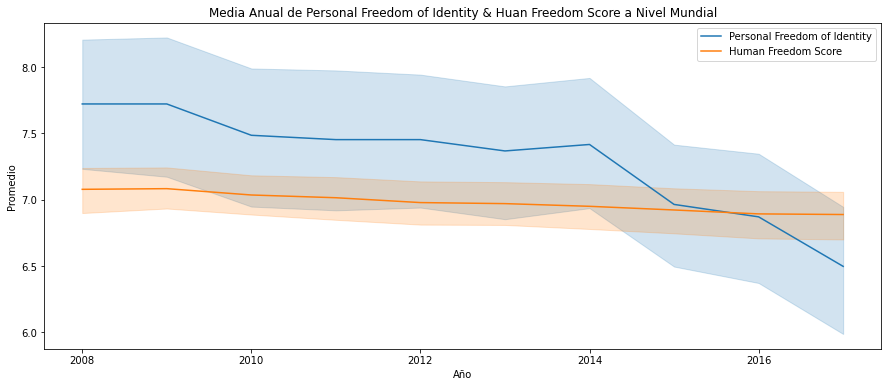

In [58]:

plt.figure(figsize=(15,6))
seaborn.lineplot(data=dataset, x=dataset.year, y=dataset.pf_identity, label = "Personal Freedom of Identity")
seaborn.lineplot(data=dataset, x=dataset.year, y=dataset.hf_score, label="Human Freedom Score")
plt.legend()
plt.xlabel("Año")
plt.ylabel("Promedio")
plt.title("Media Anual de Personal Freedom of Identity & Huan Freedom Score a Nivel Mundial")

## Resolución Ejercicio 2.2

Text(0.5, 0.98, 'Media Anual y Regional de Identidad Personal')

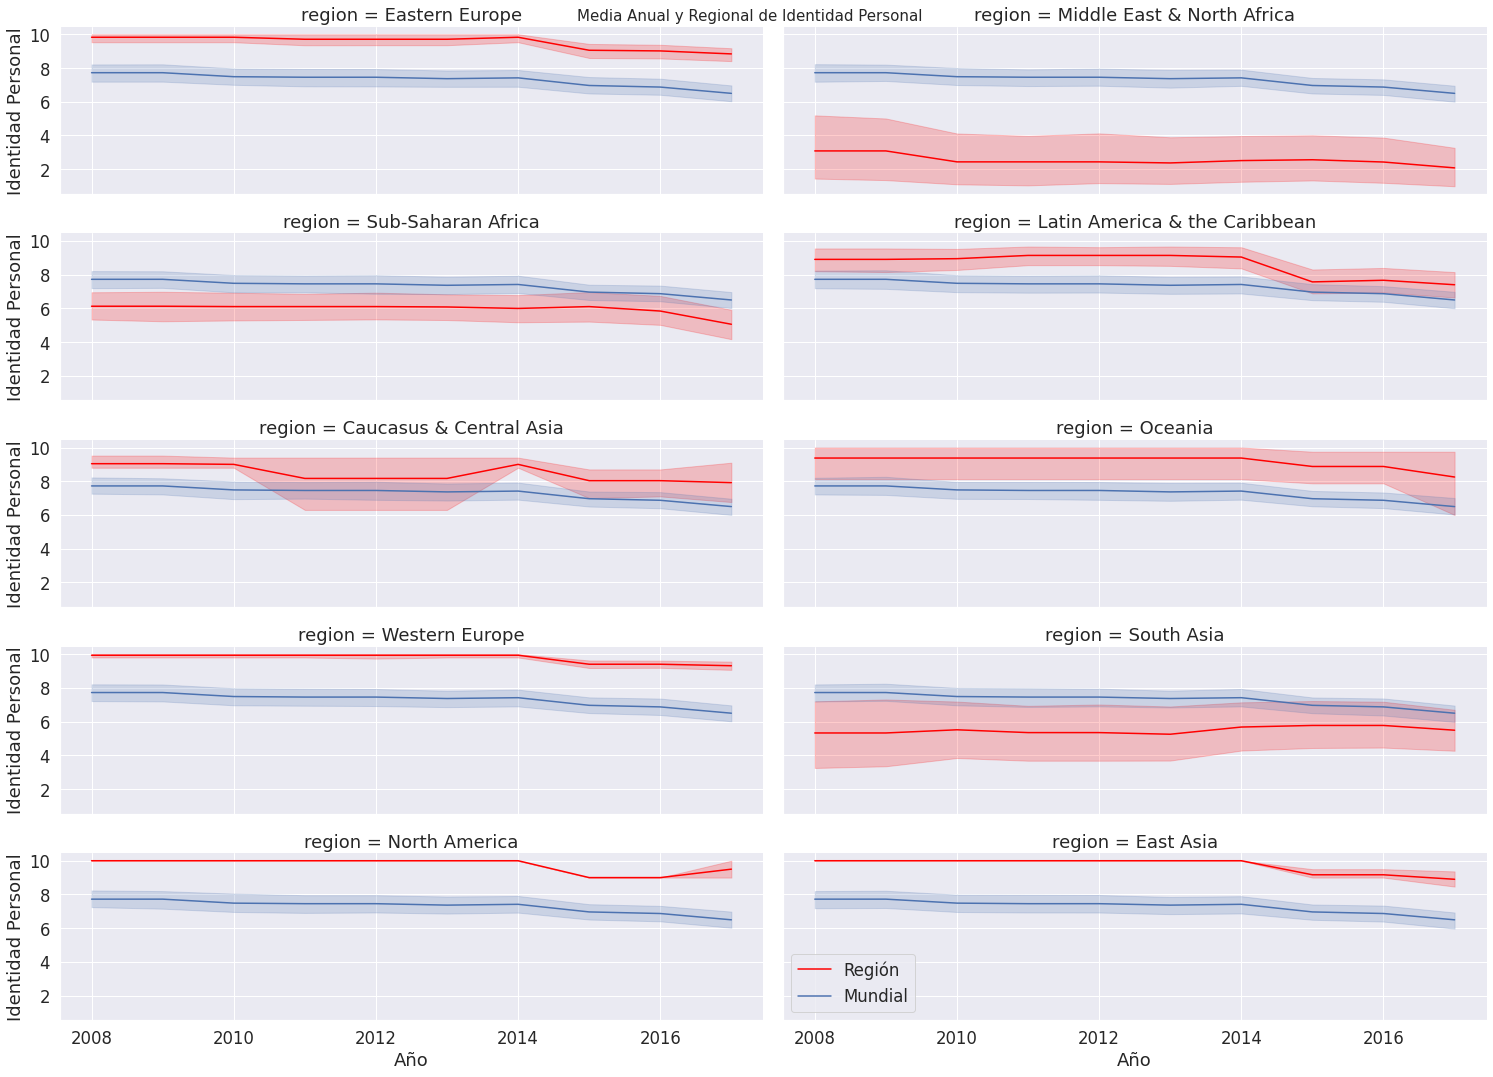

In [59]:
seaborn.set(font_scale = 1.5)
# pf_identity
g = seaborn.FacetGrid(data= dataset, col="region", col_wrap=2,
                  height=3, aspect=3.5, despine=True)
g.map(seaborn.lineplot, "year", "pf_identity", label="Región", color="red")
g.map(seaborn.lineplot, data=dataset, x=dataset.year, y=dataset.pf_identity, label="Mundial")
plt.legend()
g.set_axis_labels("Año", "Identidad Personal") 
g.fig.suptitle('Media Anual y Regional de Identidad Personal', fontsize=15)


La principal ventaja que tiene el separar la variable pf_identity por región es que nos permite diferenciar aquellas regiones que se encuentran por encima del promedio mundial de aquellas que se encuentran por debajo. Las únicas regiones cuyo pf_identity promedio se encuentran por debajo del promedio mundial son África Subsahariana y la región Norte del mismo continente. Algo que llama la atención es que a lo largo de los años ningua región tuvo un cambio radical en su posicionamiento relativo, es decir, aquellas regiones que en 2008 se encontraban por encima del promedio mundial siguen estando por encima en el año 2016, y lo mismo sucede para las regiones que estaban por debajo del promedio mundial, aún no han podido avanzar. 

Text(0.5, 0.98, 'Media Anual y Regional de Puntuación de Libertad Humana')

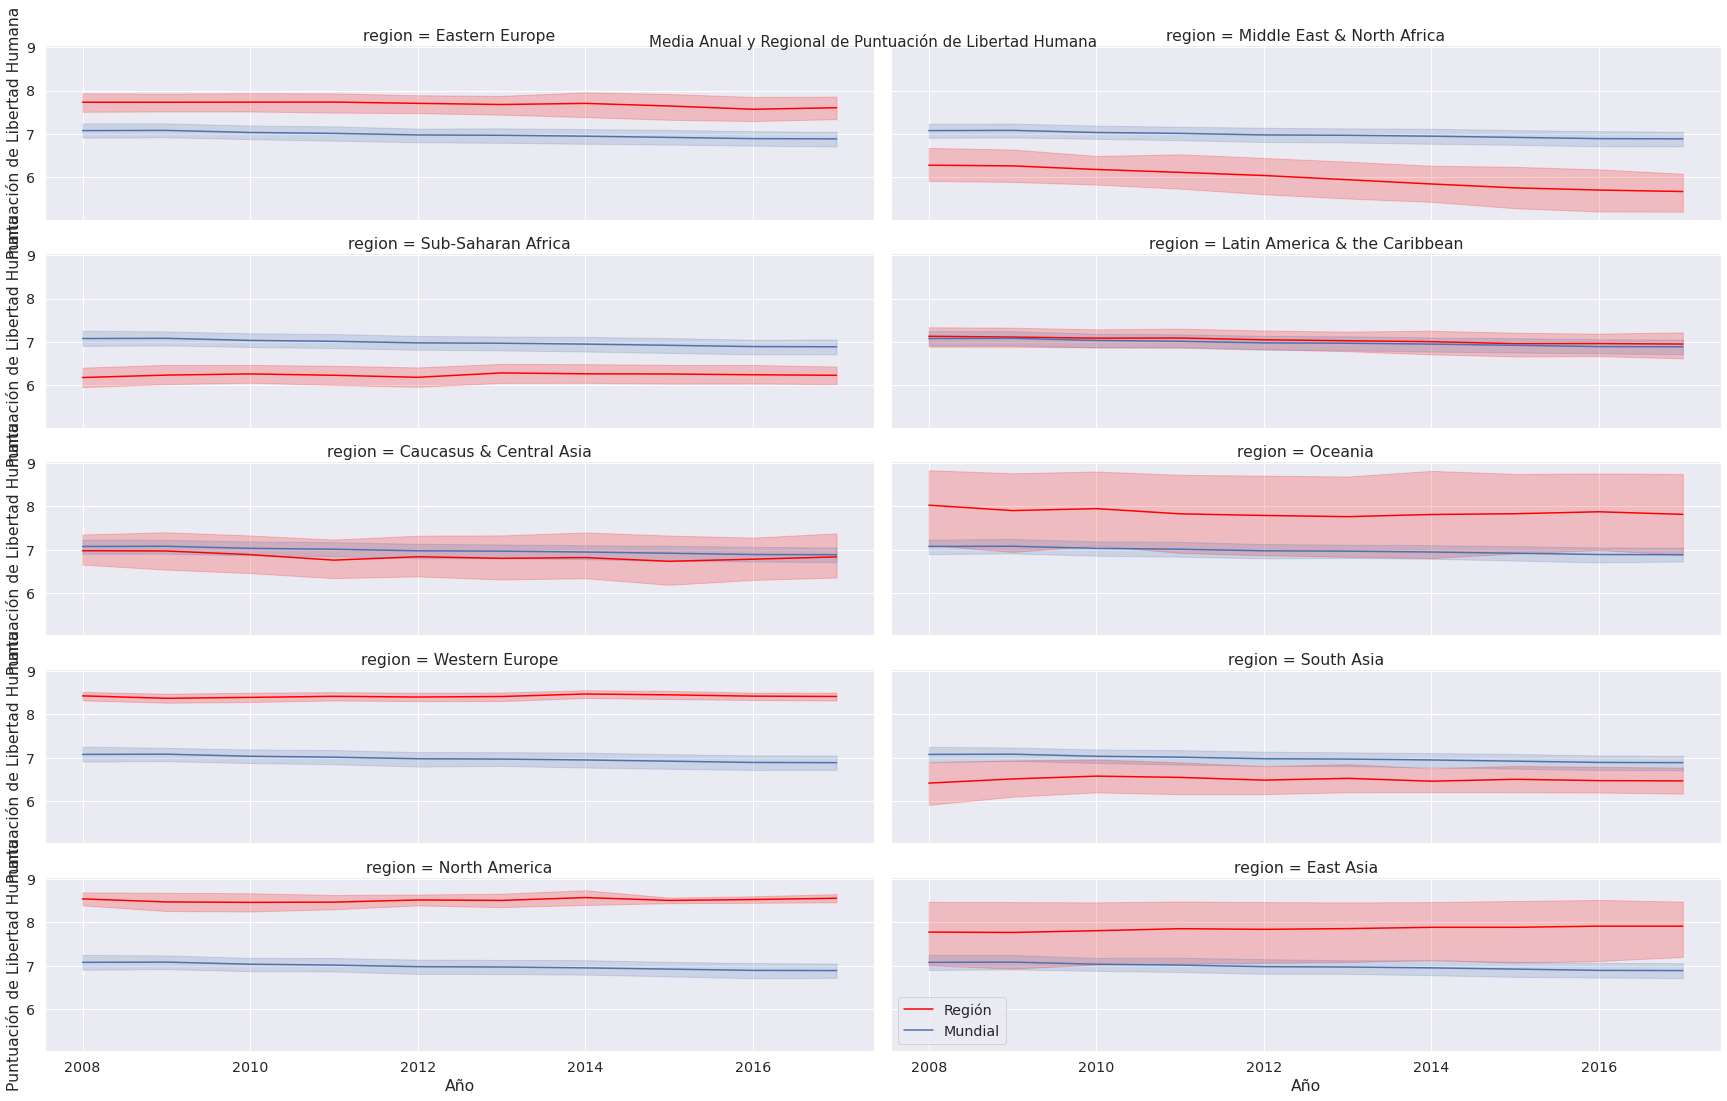

In [60]:
seaborn.set(font_scale = 1.3)
# hf_score
g = seaborn.FacetGrid(data= dataset, col="region", col_wrap=2,
                  height=3, aspect=4, despine=True)
g.map(seaborn.lineplot, "year", "hf_score", label="Región", color="red")
g.map(seaborn.lineplot, data=dataset, x=dataset.year, y=dataset.hf_score, label="Mundial")
plt.legend()
g.set_axis_labels("Año", "Puntuación de Libertad Humana") 
g.fig.suptitle('Media Anual y Regional de Puntuación de Libertad Humana', fontsize=15)

La tendencia observada para la variable hf_score es casi la misma cuando vemos al mundo en su totalidad que cuando la separamos por región, en ambos casos la misma se encuentra casi invariable a través del tiempo. Esto tiene total sentido, ya que en definitiva, es el hecho de que el hf_score por región permanece casi invariable lo que explica por qué el hf_score mundial tampoco cambió en el tiempo. 

## Resolución Ejercicio 2.3

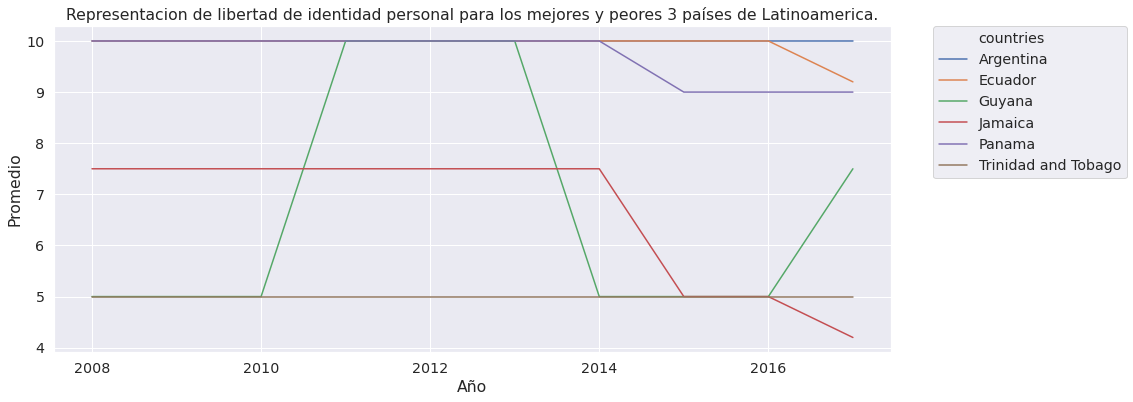

In [61]:
LATAM  = dataset[dataset.region == 'Latin America & the Caribbean']

LATAM_countries = LATAM.groupby("countries").pf_identity.mean().reset_index()
LATAM_sorted = LATAM_countries.sort_values("pf_identity")

df1 = dataset[(dataset.countries == "Trinidad and Tobago")|(dataset.countries == "Argentina")| (dataset.countries == "Jamaica")| (dataset.countries == "Panama")|(dataset.countries == "Ecuador")|(dataset.countries == "Guyana")]

# Gráfico
plt.figure(figsize=(15,6))
seaborn.lineplot(data=df1, x=df1.year, y=df1.pf_identity, hue=df1.countries, )
plt.xlabel("Año")
plt.ylabel("Promedio")
plt.title("Representacion de libertad de identidad personal para los mejores y peores 3 países de Latinoamerica.")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


En base a los promedios de la variable _pf_identity_ para cada país (entre 2008 y 2017), se seleccionan los 3 peores y 3 mejores países. Estos son:
Mejores: Argentina (este comparte el puesto 1 con Bahamas, Suriname  Bolvia Colombia y Uruguay), Ecuador y Panamá.
Peores:  Trinidad y Tobago (que comparte peor posicion con Barbados) Jamaica y Guyana.

En el gráfico del punto 2.2 se observa que la variable pf_identity en la región latinomericana venía relativamente estable hasta que sufre una pequeña caída en el año 2014. Si bien no se puede asegurar que dicha caída se deba exclusivamente a lo que sucedió con Panamá y Jamaica, estos países tuvieron decaimientos muy pronunciados justo el mismo año, los cuales seguramente contribuyeron, al menos en parte, al deterioramento de la variable en la región.

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


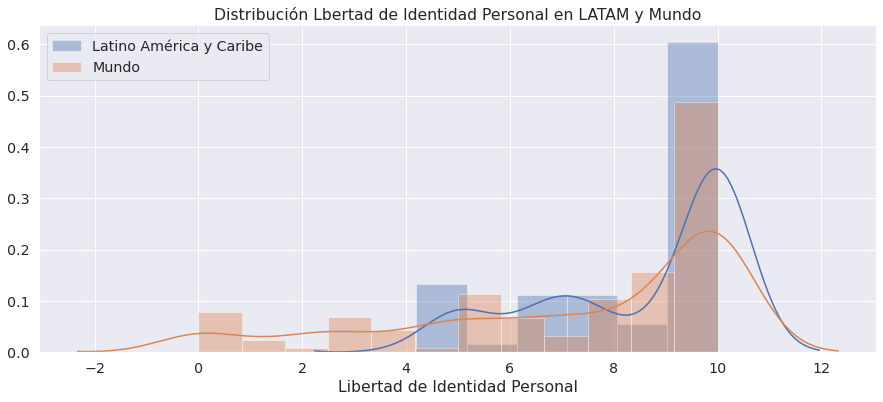

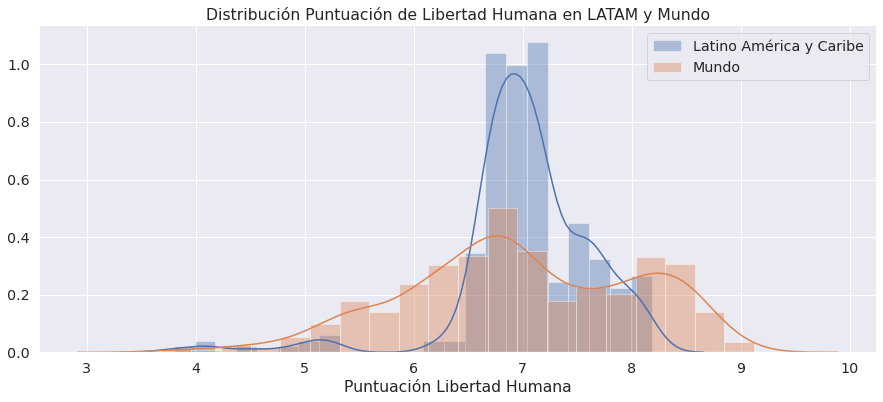

In [62]:
LATAM  = dataset[dataset.region == 'Latin America & the Caribbean']

plt.figure(figsize=(15,6))
plt.title("Distribución Lbertad de Identidad Personal en LATAM y Mundo")
seaborn.distplot(LATAM.pf_identity.dropna(), label ="Latino América y Caribe")
seaborn.distplot(dataset.pf_identity.dropna(), label ='Mundo')
plt.xlabel("Libertad de Identidad Personal")
plt.legend()
seaborn.despine()
plt.show()

plt.figure(figsize=(15,6))
plt.title("Distribución Puntuación de Libertad Humana en LATAM y Mundo")
seaborn.distplot(LATAM.hf_score.dropna(), label='Latino América y Caribe')
seaborn.distplot(dataset.hf_score.dropna(), label='Mundo')
plt.xlabel("Puntuación Libertad Humana")
plt.legend()
seaborn.despine()
plt.show()


En el primer gráfico, en primer lugar se puede afirmar que la distribución de **pf_identity** para América Latina y el Caribe es discreta. Además visualmente la distribución de dicha variable se asemeja a un ditribución asimétrica negativa, es decir, la cola de la distribución se alarga para valores inferiores a la media. Se puede visualizar que la mayoría de los  valores se aglomeran alrededor del valor de la varibla igual a 10.

En el segundo gráfico se evidencia que la distribución de la variable  hf_score para América Latina y el Caribe se asemeja a una distribución Gaussiana aunque definitivamente no es una distribución normal.Y con respecto a la variable hf_score para el mundo, esta tiene mayor dispersión que la misma en América **Latina**. 
Posiblemente no corresponda usar todos los valores de hf_score para LATAM dado que el histograma muestra un outlier (perteneciente a Venezuela)

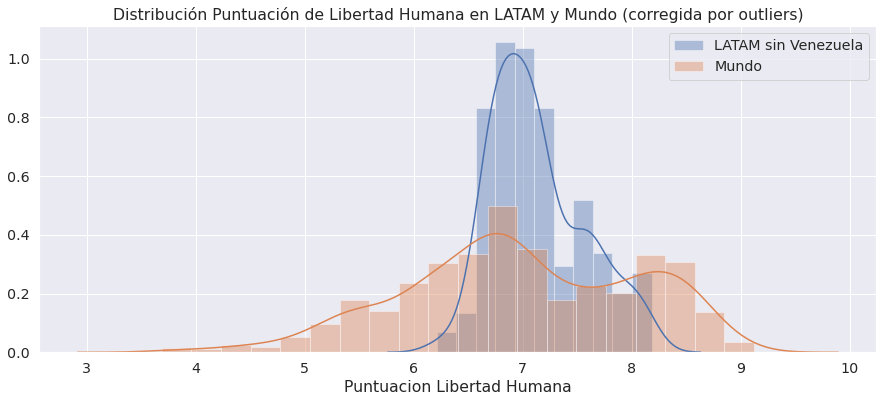

In [63]:
#Distribución hf_score removiendo outliers de LATAM
LATAM_limpio = LATAM[LATAM.hf_score >5.5]
#LATAM
plt.figure(figsize=(15,6))
plt.title('Distribución Puntuación de Libertad Humana en LATAM y Mundo (corregida por outliers)')
seaborn.distplot(LATAM_limpio.hf_score, label= 'LATAM sin Venezuela')
seaborn.distplot(dataset.hf_score.dropna(), label= 'Mundo')
plt.xlabel("Puntuacion Libertad Humana")
plt.legend()
plt.show()

Al remover al outlier Venezuela y quedarnos sólamente con los países latinoamericanos que tienen un hf_score más cercano al de la media de la región, se puede ver como se "acortó" la cola izquierda de la región y la distribución ahora se parece mucho más a una normal.

## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.
3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.
4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.



## Resolución Ejercicio 4.1: Pairplot

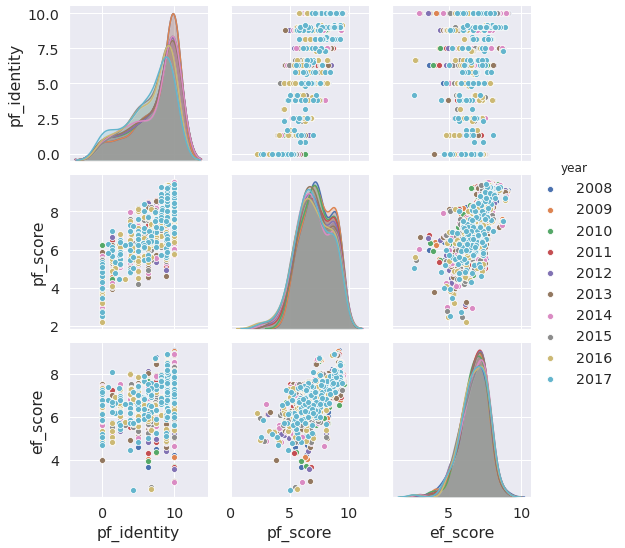

In [64]:
#filtro las columnas de interés:
df_pairplot = dataset.loc[:, ["year","pf_identity", "pf_score", "ef_score"]]
seaborn.pairplot(data= df_pairplot, hue = "year")
plt.show()


Las únicas conclusiones relevantes que se pueden sacar están en la relación entre la variable pf_score y ef_score, es decir entre la libertad personal y la libertad económica. Esto es así porque las demás relaciones presentan un grado de correlación demasiado alto como para extraer conclusiones robustas. Es decir, al ser la variable pf_identity parte de la propia construcción de la variable pf_score, es esperable que aquellos países con un bajo pf_identity tengan también un bajo pf_score. Por eso, y para responder la pregunta, no es que sea inadecuado incorporar al gráfico los valores de pf_identity, sino que no tiene mucho sentido, ya que la relación entre esa variable y las demás es muy intuitiva y fácil de saber de antemano.

Por otra parte, y volviendo a la relación entre la libertad personal y la económica, las conclusiones que se pueden sacar del gráfico es que exista una relación levemente positiva entre ellas, en el sentido de que los países con mayor ef_score tambien suelen ser los países con mayor pf_score. Adicionalmente, se puede apreciar por la concentración de puntos celestes que a medida que transcurrieron los años todos los países se fueron "acercando" entre ellos en lo que respecta a su ranking de libertad económica y personal. 

## Resolución Ejercicio 4.2

**¿ Existe correlación entre pf_identity y pf_score?**

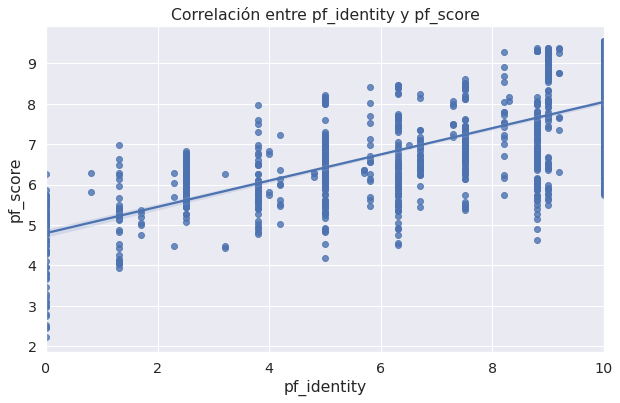

In [65]:
plt.figure(figsize=(10,6))
plt.title('Correlación entre pf_identity y pf_score')

seaborn.regplot(data= df_pairplot, x="pf_identity", y="pf_score")
plt.show()

**¿ Existe correlación entre pf_identity y ef_score?**

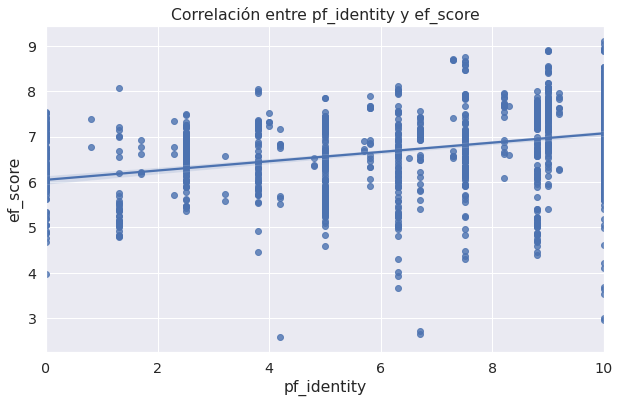

In [66]:
plt.figure(figsize=(10,6))
plt.title('Correlación entre pf_identity y ef_score')

seaborn.regplot(data= df_pairplot, x="pf_identity", y="ef_score")
plt.show()

Parece haber una relación positiva entre _pf_identity_ y _pf_score_. Dado que la primera es un componente de la segunda esto tiene sentido. Sin embargo, dada la dispesión de la variable pf_identity sobre la recta de regresión, la bondad de ajuste del modelo debería ser baja.
Esto último sucede también en la relación entre _pf_identity_ y _ef_score_. Es posible que puedan ajustarse mútiples rectas de regresión (incluso algunas con pendiente negativa) y que se obtengan para estas coeficientes de determinación similares.

Por otro lado, debe considerarse que correlación no implica causalidad (especialmente en el segundo caso), y si existe causalidad esta puede ser biunívoca.


## Resolución Ejercicio 4.3 y 4.4

**Gráficos heatmap**

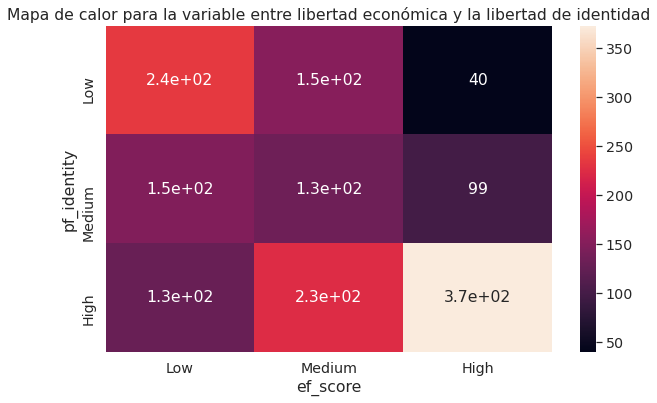

In [67]:
# Ejercicio 3

pf_id_segment = pandas.qcut(df_pairplot.pf_identity,  labels = ["Low", "Medium", "High"],q= 4, duplicates = "drop")
ef_score_segment = pandas.qcut(df_pairplot.ef_score, labels = ["Low", "Medium", "High"] ,q= 3, duplicates = "drop")
#ef_score_cuted
pf_score_segment = pandas.qcut(df_pairplot.pf_score, labels = ["Low", "Medium", "High"], q= 3, duplicates = "drop")
#pf_score_cuted

# Ejercicio 4
plt.figure(figsize=(10,6))

exp1 = pandas.crosstab(pf_id_segment, ef_score_segment)
seaborn.heatmap(exp1, annot=True)
plt.title('Mapa de calor para la variable entre libertad económica y la libertad de identidad')
plt.show()

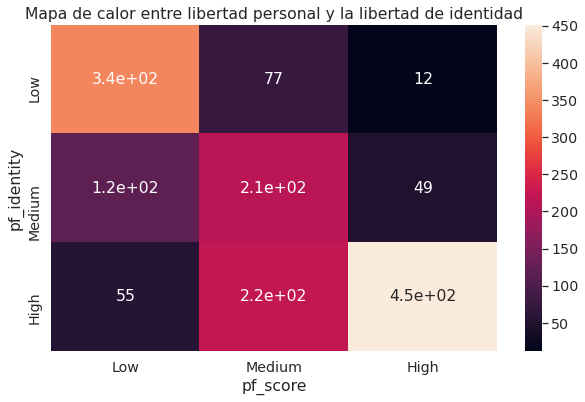

In [68]:
plt.figure(figsize=(10,6))
exp2= pandas.crosstab(pf_id_segment, pf_score_segment)
seaborn.heatmap(exp2, annot=True)
plt.title('Mapa de calor entre libertad personal y la libertad de identidad')
plt.show()


Puede verse que en la variable _pf_identity_ quantil 75 es igual al quantil 100 (por es en _pf_id_segment_ q=4) 


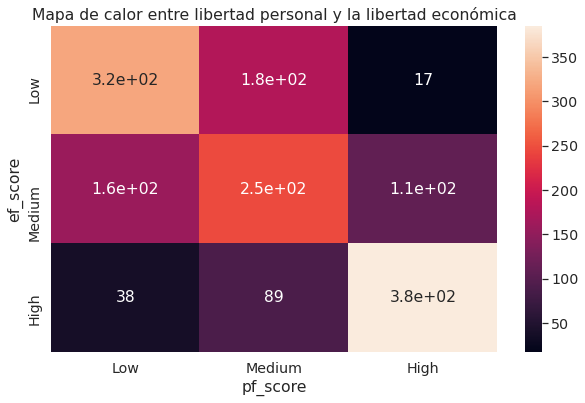

In [69]:
plt.figure(figsize=(10,6))
exp3= pandas.crosstab(ef_score_segment, pf_score_segment)
seaborn.heatmap(exp3, annot=True) 
plt.title('Mapa de calor entre libertad personal y la libertad económica')
plt.show()

# Parte 2


## 3. Distribuciones

2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

In [70]:
# Pruebas de Kolgomorov Smirnof para pf_identity y hf_score
#Para contrastar si las variables tienen distribución normal hay que primero normalizar pf_score y hf_score.

# prueba de Kolmogorov-Smirnov, Hipótesis Nula: dos distribuciones G(x) y F(x) son iguales.


def normalize(series):
    x=series
    media= x.mean()
    desv_estandar = x.std()
    serie_norm = (x-media)/desv_estandar
    return serie_norm

pf_id_normalized = normalize(dataset.pf_identity.dropna())
hf_score_normalized = normalize(dataset.hf_score.dropna())
LATAM_pf_id_normalized = normalize(LATAM.pf_identity.dropna())
LATAM_hf_score_normalized = normalize(LATAM.hf_score.dropna())



pf_id_kgs = scipy.stats.kstest(pf_id_normalized, "norm")
hf_score_kgs = scipy.stats.kstest(hf_score_normalized, "norm")
LATAM_pfid_kgs =scipy.stats.kstest(LATAM_pf_id_normalized, "norm")
LATAM_hfscore_kgs = scipy.stats.kstest(LATAM_hf_score_normalized, "norm")

print("El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Libertad de Identidad Personal es:", pf_id_kgs[1])
print("El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Libertad de Identidad Personal en LATAM es:", LATAM_pfid_kgs[1])
print("El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Libertad Humana es:", hf_score_kgs[1])
print("El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Libertad Humana en LATAM es:", LATAM_hfscore_kgs[1])



El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Libertad de Identidad Personal es: 1.2026957468430114e-66
El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Libertad de Identidad Personal en LATAM es: 1.4893561222947153e-28
El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Libertad Humana es: 4.404265240431568e-06
El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Libertad Humana en LATAM es: 7.636033514162593e-07


__Se rechaza la hipótesis nula de que la distribución de pf_identity es normal.__

__Se rechaza la hipótesis nula de que la distribución de hf_score es normal.__

__Se rechaza la hipótesis nula de que la distribución de pf_identity en latinoamerica es normal.__

__Se rechaza la hipótesis nula de que la distribución de hf_score en lationamerica es normal.__


## 4. Correlaciones

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

In [71]:
# El coeficiente de Pearson es una medida de asociación entre variables que no se comportan normalmente.

pearson_pfid_pfscore = scipy.stats.spearmanr(dataset.pf_identity.dropna(), dataset.pf_score.dropna())
pearson_efscore_pfscore = scipy.stats.spearmanr(dataset.ef_score.dropna(), dataset.pf_score.dropna())
pearson_pfid_efscore = scipy.stats.spearmanr(dataset.pf_identity.dropna(), dataset.ef_score.dropna())

print("El coeficiente de correlación de Pearson entre Libertad de Identidad Personal y Libertad Personal es:", round(pearson_pfid_pfscore[0], 2))
print("El coeficiente de correlación de Pearson entre Libertad Económica y Libertad Personal es:", round(pearson_efscore_pfscore[0], 2))
print("El coeficiente de correlación de Pearson entre Libertad de Identidad Personal y Libertad Económica es:", round(pearson_pfid_efscore[0], 2))


El coeficiente de correlación de Pearson entre Libertad de Identidad Personal y Libertad Personal es: 0.73
El coeficiente de correlación de Pearson entre Libertad Económica y Libertad Personal es: 0.71
El coeficiente de correlación de Pearson entre Libertad de Identidad Personal y Libertad Económica es: 0.4


De este conjunto de datos, quizás la relación más interesante de observar es la de las variables libertad económica y libertada humana. En el siguiente gráfico puede observarse que a mayor libertad económica, mayor libertad humana se obtiene.

In [72]:
pearson_hf_ef = scipy.stats.spearmanr(dataset.ef_score.dropna(), dataset.hf_score.dropna())
print("El coeficiente de correlación de Pearson entre Libertad Económica y Libertad Humana es:", round(pearson_hf_ef[0], 2))

El coeficiente de correlación de Pearson entre Libertad Económica y Libertad Humana es: 0.88


**Gráfico para visualizar la Relación entre Libertad Humana y  Libertad Económica en el Mundo**

Text(0.5, 0, 'Libertad Económica')

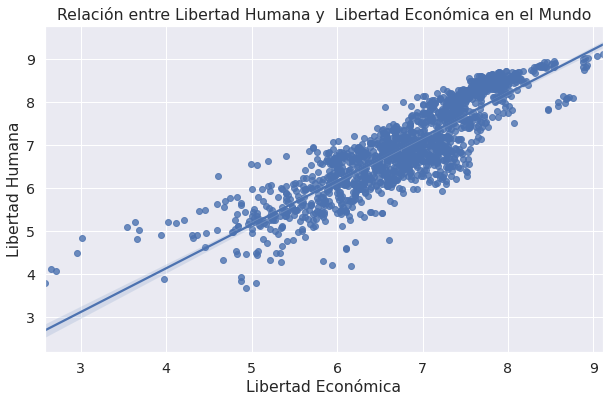

In [73]:
plt.figure(figsize=(10,6))
seaborn.regplot(data= dataset, x="ef_score", y="hf_score")
plt.title('Relación entre Libertad Humana y  Libertad Económica en el Mundo')
plt.ylabel("Libertad Humana")
plt.xlabel("Libertad Económica")
plt.show()

### Conclusión.
Hemos obtenido un alto coeficiente de correlación (0.88) entre la libertad económica y la libertad humana y mediante el gráfico anterior confirmamos dicha correlación positiva, es decir, que cuando aumenta la libertad económica también lo hace la libertad humana.